In [37]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
df = pd.read_excel("C:/Users/year3/Downloads/Lab Session Data (1).xlsx")
df.head()

,Customer,Candies (#),Mangoes (Kg),Milk Packets (#),Payment (Rs),Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Candy,Mango,Milk
0,C_1,20,6,2,386,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,55.0,18.0
1,C_2,16,3,6,289,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,C_3,27,6,2,393,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,C_4,19,1,2,110,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,C_5,24,4,2,280,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:

df = df.drop(df.filter(like='Unnamed').columns, axis=1)
df = df.drop(['Candy', 'Mango', 'Milk'], axis=1)
df.head()

,Customer,Candies (#),Mangoes (Kg),Milk Packets (#),Payment (Rs)
0,C_1,20,6,2,386
1,C_2,16,3,6,289
2,C_3,27,6,2,393
3,C_4,19,1,2,110
4,C_5,24,4,2,280


In [9]:
# Matric A and C
A = df[['Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)']]
C = df['Payment (Rs)']

print(A)
# Matrix A has a dimension of 3 
print(C)

   Candies (#)  Mangoes (Kg)  Milk Packets (#)
0           20             6                 2
1           16             3                 6
2           27             6                 2
3           19             1                 2
4           24             4                 2
5           22             1                 5
6           15             4                 2
7           18             4                 2
8           21             1                 4
9           16             2                 4
0    386
1    289
2    393
3    110
4    280
5    167
6    271
7    274
8    148
9    198
Name: Payment (Rs), dtype: int64


In [19]:
A = np.array([
    [20, 6, 2],
    [16, 3, 6],
    [27, 6, 2],
    [19, 1, 2],
    [24, 4, 2],
    [22, 1, 5],
    [15, 4, 2],
    [18, 4, 2],
    [21, 1, 4],
    [16, 2, 4]
])

C = np.array([386, 289, 393, 110, 280, 167, 271, 274, 148, 198])
A_pseudoInv = np.linalg.pinv(A)

# Compute the cost vector x
x = np.dot(A_pseudoInv, C)

dimension=A.shape[1]
print("the  dimension is:",dimension)
vctr=A.shape[0]
print("the no.of vectors is:",vctr)
rank = np.linalg.matrix_rank(A)
print("the rank is:",rank)


print("Cost of each product:")
print("Candies:", round(x[0],2))
print("Mangoes:", round(x[1], 2))
print("Milk Packets:", round(x[2], 2))

the  dimension is: 3
the no.of vectors is: 10
the rank is: 3
Cost of each product:
Candies: 1.0
Mangoes: 55.0
Milk Packets: 18.0


In [27]:
print(df.head())

df['Class'] = ['RICH' if payment > 200 else 'POOR' for payment in df['Payment (Rs)']]


X = df[['Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)']]

y = df['Class']

  Customer  Candies (#)  Mangoes (Kg)  Milk Packets (#)  Payment (Rs)
0      C_1           20             6                 2           386
1      C_2           16             3                 6           289
2      C_3           27             6                 2           393
3      C_4           19             1                 2           110
4      C_5           24             4                 2           280


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [36]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.5
Classification Report:
              precision    recall  f1-score   support

        POOR       0.50      1.00      0.67         1
        RICH       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2

Confusion Matrix:
[[1 0]
 [1 0]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Mean Price: 1560.663453815261
Variance of Price: 58732.365352539186
Mean Price on Wednesdays: 1550.706
Population Mean Price: 1560.663453815261
Mean Price in April: 1698.9526315789474
Population Mean Price: 1560.663453815261
Probability of Making a Loss: 0.4979919678714859
Probability of Making a Profit on Wednesdays: 0.42
Conditional Probability of Making a Profit Given It's Wednesday: 0.8433870967741935


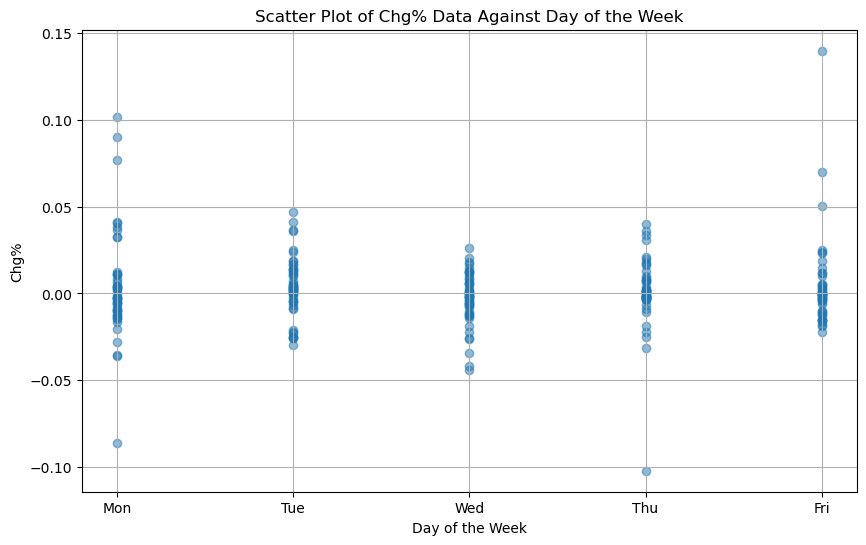

In [4]:
#A4
import pandas as pd
import statistics
import matplotlib.pyplot as plt

def load_data(file_path):
    try:
        df = pd.read_excel(file_path, sheet_name='IRCTC Stock Price')
        return df
    except FileNotFoundError:
        print(f"Error: The file '{file_path}' was not found.")
        raise
def calculate_price_statistics(df):
    try:
        df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
        price_data = df['Price'].dropna()
        mean_price = statistics.mean(price_data)
        variance_price = statistics.variance(price_data)
        return mean_price, variance_price
    except KeyError:
        print("Error: 'Price' column not found in the data.")
        raise
    except statistics.StatisticsError as e:
        print(f"Error calculating statistics: {e}")
        raise

def calculate_mean_wednesday_price(df, mean_price):
    try:
        df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
        wednesday_data = df[df['Day'] == 'Wed']['Price'].dropna()
        mean_wednesday_price = statistics.mean(wednesday_data)
        return mean_wednesday_price
    except KeyError:
        print("Error: 'Day' or 'Price' column not found in the data.")
        raise
    except statistics.StatisticsError as e:
        print(f"Error calculating Wednesday mean: {e}")
        raise

def calculate_mean_april_price(df, mean_price):
    try:
        df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
        april_data = df[df['Month'] == 'Apr']['Price'].dropna()
        mean_april_price = statistics.mean(april_data)
        return mean_april_price
    except KeyError:
        print("Error: 'Month' or 'Price' column not found in the data.")
        raise
    except statistics.StatisticsError as e:
        print(f"Error calculating April mean: {e}")
        raise

def calculate_loss_probability(df):
    try:
        df['Chg%'] = pd.to_numeric(df['Chg%'], errors='coerce')
        loss_probability = (df['Chg%'] < 0).mean()
        return loss_probability
    except KeyError:
        print("Error: 'Chg%' column not found in the data.")
        raise

def calculate_profit_probability_wednesday(df):
    try:
        df['Chg%'] = pd.to_numeric(df['Chg%'], errors='coerce')
        wednesday_data = df[df['Day'] == 'Wed']
        profit_probability_wednesday = (wednesday_data['Chg%'] > 0).mean()
        return profit_probability_wednesday
    except KeyError:
        print("Error: 'Day' or 'Chg%' column not found in the data.")
        raise

def calculate_conditional_profit_probability(df):
    try:
        df['Chg%'] = pd.to_numeric(df['Chg%'], errors='coerce')
        overall_profit_probability = (df['Chg%'] > 0).mean()
        profit_probability_wednesday = calculate_profit_probability_wednesday(df)
        conditional_profit_probability = profit_probability_wednesday / overall_profit_probability
        return conditional_profit_probability
    except ZeroDivisionError:
        print("Error: Division by zero when calculating conditional probability.")
        raise
    except KeyError:
        print("Error: 'Chg%' column not found in the data.")
        raise

def plot_scatter_chg_day(df):
    try:
        df['Day'] = pd.Categorical(df['Day'], categories=['Mon', 'Tue', 'Wed', 'Thu', 'Fri'], ordered=True)
        df['Chg%'] = pd.to_numeric(df['Chg%'], errors='coerce')
        plt.figure(figsize=(10, 6))
        plt.scatter(df['Day'].cat.codes, df['Chg%'], alpha=0.5)
        plt.xticks(ticks=range(5), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri'])
        plt.xlabel('Day of the Week')
        plt.ylabel('Chg%')
        plt.title('Scatter Plot of Chg% Data Against Day of the Week')
        plt.grid(True)
        plt.show()
    except KeyError:
        print("Error: 'Day' or 'Chg%' column not found in the data.")
        raise

def main(file_path):
    df = load_data(file_path)
    df['Day'] = pd.Categorical(df['Day'], categories=['Mon', 'Tue', 'Wed', 'Thu', 'Fri'])
    mean_price, variance_price = calculate_price_statistics(df)
    print(f"Mean Price: {mean_price}")
    print(f"Variance of Price: {variance_price}")
    mean_wednesday_price = calculate_mean_wednesday_price(df, mean_price)
    print(f"Mean Price on Wednesdays: {mean_wednesday_price}")
    print(f"Population Mean Price: {mean_price}")
    mean_april_price = calculate_mean_april_price(df, mean_price)
    print(f"Mean Price in April: {mean_april_price}")
    print(f"Population Mean Price: {mean_price}")
    loss_probability = calculate_loss_probability(df)
    print(f"Probability of Making a Loss: {loss_probability}")
    profit_probability_wednesday = calculate_profit_probability_wednesday(df)
    print(f"Probability of Making a Profit on Wednesdays: {profit_probability_wednesday}")
    conditional_profit_probability = calculate_conditional_profit_probability(df)
    print(f"Conditional Probability of Making a Profit Given It's Wednesday: {conditional_profit_probability}")
    plot_scatter_chg_day(df)

if __name__ == "__main__":
    file_path = "C:/Users/year3/Downloads/Lab Session Data (2).xlsx"  # Replace with the path to your Excel file
    main(file_path)

In [12]:
import pandas as pd
import numpy as np

def load_data(file_path):
    try:
        df = pd.read_excel(file_path, sheet_name='thyroid0387_UCI')
        return df
    except FileNotFoundError:
        print(f"Error: The file '{file_path}' was not found.")
        raise

def explore_data(df):
    print("Data Shape:", df.shape)
    print("Data Columns:", df.columns)
    print("Data Types:", df.dtypes)

def identify_data_types(df):
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
    categorical_cols = df.select_dtypes(include=['object']).columns

    print("Numeric Columns:", numeric_cols)
    print("Categorical Columns:", categorical_cols)

    for col in categorical_cols:
        unique_values = df[col].unique()
        if len(unique_values) <= 2:
            print(f"Column: {col} (Binary/Nominal)")
        elif len(unique_values) > 2 and df[col].value_counts().index.is_monotonic:
            print(f"Column: {col} (Ordinal)")
        else:
            print(f"Column: {col} (Nominal)")

    for col in numeric_cols:
        if df[col].dtype == 'int64':
            print(f"Column: {col} (Interval/Ratio - Integer)")
        else:
            print(f"Column: {col} (Interval/Ratio - Continuous)")

def encode_categorical_variables(df, categorical_cols):
    for col in categorical_cols:
        unique_values = df[col].unique()
        if len(unique_values) <= 2:
            print(f"Column: {col} (Binary/Nominal) - One-Hot Encoding")
            df = pd.get_dummies(df, columns=[col], drop_first=True)
        elif len(unique_values) > 2 and df[col].value_counts().index.is_monotonic:
            print(f"Column: {col} (Ordinal) - Label Encoding")
            from sklearn.preprocessing import LabelEncoder
            le = LabelEncoder()
            df[col] = le.fit_transform(df[col])
        else:
            print(f"Column: {col} (Nominal) - One-Hot Encoding")
            df = pd.get_dummies(df, columns=[col], drop_first=True)
    return df

def study_numeric_variables(df, numeric_cols):
    for col in numeric_cols:
        print(f"Column: {col}")
        print(f"Min value: {df[col].min()}")
        print(f"Max value: {df[col].max()}")
        print(f"Range: {df[col].max() - df[col].min()}")
        print()

def check_missing_values(df):
    print("Missing Values:", df.isnull().sum())

def detect_outliers(df, numeric_cols):
    Q1 = df[numeric_cols].quantile(0.25)
    Q3 = df[numeric_cols].quantile(0.75)
    IQR = Q3 - Q1

    outliers = df[(df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR))]
    print("Outliers:", outliers)

def calculate_summary_stats(df, numeric_cols):
    for col in numeric_cols:
        print(f"Column: {col}")
        print(f"Mean: {df[col].mean()}")
        print(f"Standard Deviation: {df[col].std()}")
        print()
def check_missing_values(df):
    print("Missing Values:", df.isnull().sum())
    for col in df.columns:
        if df[col].dtype in ['int64', 'float64']:
            if df[col].nunique() > 2:  # Check for outliers
                df[col].fillna(df[col].median(), inplace=True)
            else:
                df[col].fillna(df[col].mean(), inplace=True)
        else:
            df[col].fillna(df[col].mode()[0], inplace=True)
    print("Missing Values after Imputation:", df.isnull().sum())
from sklearn.preprocessing import StandardScaler, MinMaxScaler

def study_numeric_variables(df, numeric_cols):
    scaler = StandardScaler()  # StandardScaler for standardization
    # scaler = MinMaxScaler()  # MinMaxScaler for normalization between 0 and 1

    for col in numeric_cols:
        print(f"Column: {col}")
        print(f"Min value: {df[col].min()}")
        print(f"Max value: {df[col].max()}")
        print(f"Range: {df[col].max() - df[col].min()}")

        # Apply normalization/scaling
        df[col] = scaler.fit_transform(df[[col]])

        print(f"Normalized Min value: {df[col].min()}")
        print(f"Normalized Max value: {df[col].max()}")
        print(f"Normalized Range: {df[col].max() - df[col].min()}")
        print()

def main(file_path):
    df = load_data(file_path)
    explore_data(df)

    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
    categorical_cols = df.select_dtypes(include=['object']).columns

    identify_data_types(df)
    df = encode_categorical_variables(df, categorical_cols)
    study_numeric_variables(df, numeric_cols)
    check_missing_values(df)
    detect_outliers(df, numeric_cols)
    calculate_summary_stats(df, numeric_cols)
    return df

if __name__ == "__main__":
    file_path = "C:/Users/year3/Downloads/Lab Session Data (2).xlsx"  # Replace with the path to your Excel file
    main(file_path)

Data Shape: (9172, 31)
Data Columns: Index(['Record ID', 'age', 'sex', 'on thyroxine', 'query on thyroxine',
       'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery',
       'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'TSH',
       'T3 measured', 'T3', 'TT4 measured', 'TT4', 'T4U measured', 'T4U',
       'FTI measured', 'FTI', 'TBG measured', 'TBG', 'referral source',
       'Condition'],
      dtype='object')
Data Types: Record ID                     int64
age                           int64
sex                          object
on thyroxine                 object
query on thyroxine           object
on antithyroid medication    object
sick                         object
pregnant                     object
thyroid surgery              object
I131 treatment               object
query hypothyroid            object
query hyperthyroid           object
lithium                      

In [13]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler

def load_data(file_path):
    try:
        df = pd.read_excel(file_path, sheet_name='thyroid0387_UCI')
        return df
    except FileNotFoundError:
        print(f"Error: The file '{file_path}' was not found.")
        raise

def identify_numeric_columns(df):
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
    return numeric_cols

def normalize_data(df, numeric_cols):
    # Initialize scalers
    min_max_scaler = MinMaxScaler()
    standard_scaler = StandardScaler()

    # Columns to apply Min-Max Normalization
    min_max_cols = [col for col in numeric_cols if df[col].min() >= 0 and df[col].max() <= 1]

    # Columns to apply Standardization
    standardize_cols = [col for col in numeric_cols if col not in min_max_cols]

    # Apply Min-Max Normalization
    if min_max_cols:
        print(f"Applying Min-Max Normalization to columns: {min_max_cols}")
        df[min_max_cols] = min_max_scaler.fit_transform(df[min_max_cols])

    # Apply Standardization
    if standardize_cols:
        print(f"Applying Standardization to columns: {standardize_cols}")
        df[standardize_cols] = standard_scaler.fit_transform(df[standardize_cols])

    return df

def main(file_path):
    df = load_data(file_path)
   
    # Identify numeric columns
    numeric_cols = identify_numeric_columns(df)
   
    # Normalize/Scale data
    df_normalized = normalize_data(df, numeric_cols)
   
    print("\nData after normalization/scaling:")
    print(df_normalized.head())
    return df_normalized

if __name__ == "__main__":
    file_path = "C:/Users/year3/Downloads/Lab Session Data (2).xlsx"  # Replace with the path to your Excel file
    df_normalized = main(file_path)

Applying Standardization to columns: ['Record ID', 'age']

Data after normalization/scaling:
   Record ID       age sex on thyroxine query on thyroxine  \
0  -1.602090 -0.037634   F            f                  f   
1  -1.602090 -0.037634   F            f                  f   
2  -1.602086 -0.027499   F            f                  f   
3  -1.601822 -0.031722   F            f                  f   
4  -1.601822 -0.035100   F            f                  f   

  on antithyroid medication sick pregnant thyroid surgery I131 treatment  ...  \
0                         f    f        f               f              f  ...   
1                         f    f        f               f              f  ...   
2                         f    f        f               f              f  ...   
3                         f    f        f               f              f  ...   
4                         f    f        f               f              f  ...   

  TT4 measured  TT4 T4U measured T4U FTI measur

In [16]:
import pandas as pd

def load_data(file_path):
    try:
        df = pd.read_excel(file_path, sheet_name='thyroid0387_UCI')
        return df
    except FileNotFoundError:
        print(f"Error: The file '{file_path}' was not found.")
        raise

def preprocess_data(df):
    # Convert categorical binary attributes to binary values (0 and 1)
    binary_cols = df.select_dtypes(include=['object']).columns
    for col in binary_cols:
        if df[col].nunique() == 2:  # If the column is binary
            df[col] = df[col].map({df[col].unique()[0]: 0, df[col].unique()[1]: 1})
    return df

def compute_similarity_measures(df):
    # Extract the first two observation vectors
    vector1 = df.iloc[0]
    vector2 = df.iloc[1]

    # Select only binary attributes
    binary_cols = df.columns[df.nunique() == 2]
    vector1_binary = vector1[binary_cols]
    vector2_binary = vector2[binary_cols]

    # Compute f11, f10, and f00
    f11 = ((vector1_binary == 1) & (vector2_binary == 1)).sum()
    f10 = ((vector1_binary == 1) & (vector2_binary == 0)).sum()
    f01 = ((vector1_binary == 0) & (vector2_binary == 1)).sum()
    f00 = ((vector1_binary == 0) & (vector2_binary == 0)).sum()

    # Compute Jaccard Coefficient (JC)
    jc = f11 / (f01 + f10 + f11) if (f01 + f10 + f11) > 0 else 0

    # Compute Simple Matching Coefficient (SMC)
    smc = (f11 + f00) / (f00 + f01 + f10 + f11) if (f00 + f01 + f10 + f11) > 0 else 0

    return jc, smc

def main(file_path):
    df = load_data(file_path)
    df = preprocess_data(df)
    jc, smc = compute_similarity_measures(df)
   
    print(f"Jaccard Coefficient (JC): {jc}")
    print(f"Simple Matching Coefficient (SMC): {smc}")

    # Compare JC and SMC
    if jc > smc:
        print("Jaccard Coefficient (JC) is higher than Simple Matching Coefficient (SMC).")
    elif jc < smc:
        print("Simple Matching Coefficient (SMC) is higher than Jaccard Coefficient (JC).")
    else:
        print("Jaccard Coefficient (JC) and Simple Matching Coefficient (SMC) are equal.")

if __name__ == "__main__":
    file_path = "C:/Users/year3/Downloads/Lab Session Data (2).xlsx"  # Replace with the path to your Excel file

    main(file_path)

Jaccard Coefficient (JC): 0.0
Simple Matching Coefficient (SMC): 0.85
Simple Matching Coefficient (SMC) is higher than Jaccard Coefficient (JC).


In [17]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

def load_data(file_path):
    try:
        df = pd.read_excel(file_path, sheet_name='thyroid0387_UCI')
        return df
    except FileNotFoundError:
        print(f"Error: The file '{file_path}' was not found.")
        raise

def preprocess_data(df):
    # Convert categorical attributes to numerical values if they are not already
    for col in df.select_dtypes(include=['object']).columns:
        df[col] = pd.factorize(df[col])[0]
    return df

def compute_cosine_similarity(df):
    # Extract the feature vectors for the first two observations
    vector1 = df.iloc[0].values.reshape(1, -1)
    vector2 = df.iloc[1].values.reshape(1, -1)

    # Compute Cosine Similarity
    cos_sim = cosine_similarity(vector1, vector2)[0][0]
   
    return cos_sim

def main(file_path):
    df = load_data(file_path)
    df = preprocess_data(df)
    cos_sim = compute_cosine_similarity(df)
   
    print(f"Cosine Similarity: {cos_sim:.4f}")

if __name__ == "__main__":
    file_path = "C:/Users/year3/Downloads/Lab Session Data (2).xlsx"  # Replace with the path to your Excel file

    main(file_path)

Cosine Similarity: 1.0000


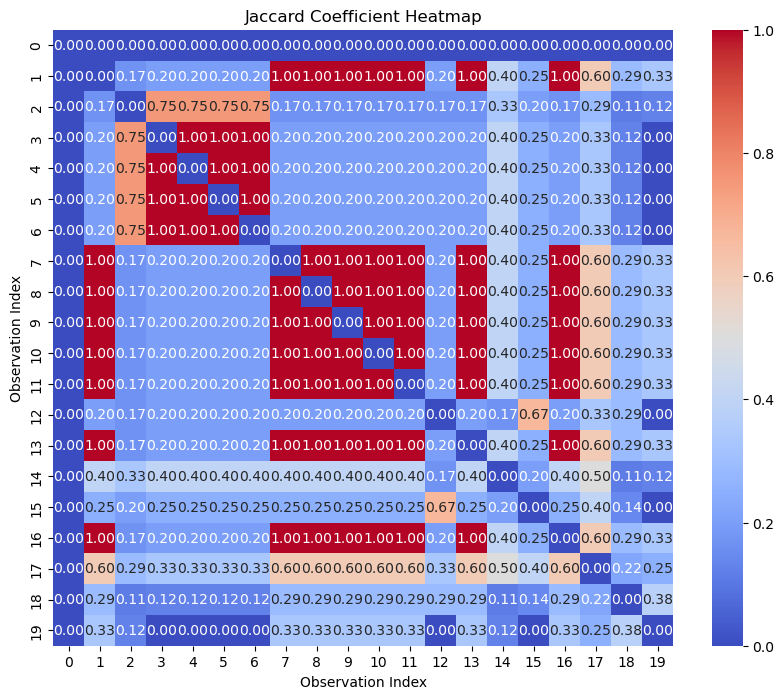

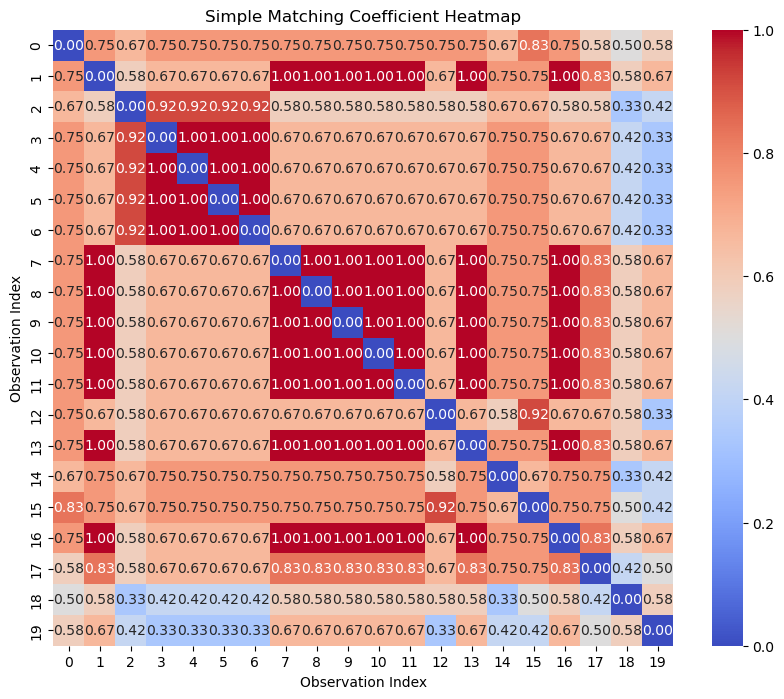

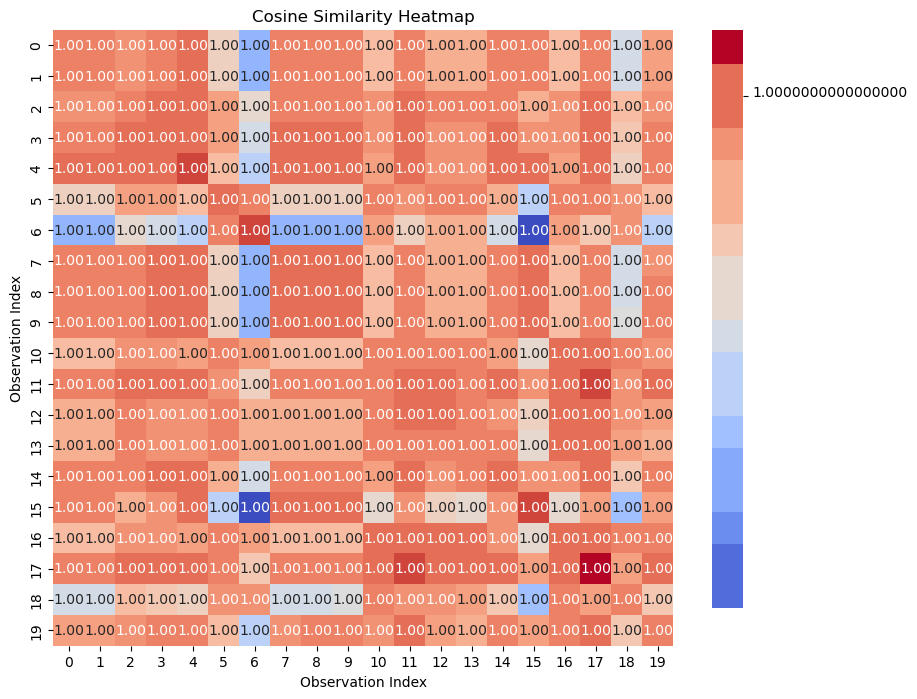

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

def load_data(file_path):
    try:
        df = pd.read_excel(file_path, sheet_name='thyroid0387_UCI')
        return df
    except FileNotFoundError:
        print(f"Error: The file '{file_path}' was not found.")
        raise

def preprocess_data(df):
    # Convert categorical attributes to numerical values if they are not already
    for col in df.select_dtypes(include=['object']).columns:
        df[col] = pd.factorize(df[col])[0]
    return df

def compute_similarity_matrices(df):
    # Extract the first 20 observation vectors
    df_20 = df.head(20)
   
    # Extract binary columns
    binary_cols = df_20.columns[df_20.nunique() == 2]
   
    # Compute JC and SMC for binary attributes
    binary_df = df_20[binary_cols]
    num_vectors = binary_df.shape[0]
   
    jc_matrix = np.zeros((num_vectors, num_vectors))
    smc_matrix = np.zeros((num_vectors, num_vectors))
   
    for i in range(num_vectors):
        for j in range(num_vectors):
            if i != j:
                vector1 = binary_df.iloc[i]
                vector2 = binary_df.iloc[j]
               
                f11 = ((vector1 == 1) & (vector2 == 1)).sum()
                f10 = ((vector1 == 1) & (vector2 == 0)).sum()
                f01 = ((vector1 == 0) & (vector2 == 1)).sum()
                f00 = ((vector1 == 0) & (vector2 == 0)).sum()
               
                jc_matrix[i, j] = f11 / (f01 + f10 + f11) if (f01 + f10 + f11) > 0 else 0
                smc_matrix[i, j] = (f11 + f00) / (f00 + f01 + f10 + f11) if (f00 + f01 + f10 + f11) > 0 else 0

    # Compute Cosine Similarity for all attributes
    vectors = df_20.values
    cos_sim_matrix = cosine_similarity(vectors)
   
    return jc_matrix, smc_matrix, cos_sim_matrix

def plot_heatmap(matrix, title):
    plt.figure(figsize=(10, 8))
    sns.heatmap(matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
    plt.title(title)
    plt.xlabel('Observation Index')
    plt.ylabel('Observation Index')
    plt.show()

def main(file_path):
    df = load_data(file_path)
    df = preprocess_data(df)
   
    jc_matrix, smc_matrix, cos_sim_matrix = compute_similarity_matrices(df)
   
    plot_heatmap(jc_matrix, 'Jaccard Coefficient Heatmap')
    plot_heatmap(smc_matrix, 'Simple Matching Coefficient Heatmap')
    plot_heatmap(cos_sim_matrix, 'Cosine Similarity Heatmap')

if __name__ == "__main__":
    file_path = "C:/Users/year3/Downloads/Lab Session Data (2).xlsx"  # Replace with the path to your Excel file
    main(file_path)